### Zadania

Lista składa się z dwóch sekcji: pierwsza (zadania 1 i 2) dotyczy metod detekcji krawędzi, druga (zadania 3 i 4) operacji na histogramach.

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

##### Zad. 1: Wyznaczenie gradientów

Wykonaj dla obrazu `coins` sztuczny obraz ilustrujący wielkość (moduł) wektora gradientu w danym punkcie. Do wyświetlenia użyj [mapy kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html) `hot` do oznaczenia wielkości gradientu odpowiednim kolorem – im większa wartość, tym bardziej czerwony (_mapa ciepła_).  
Gdzie gradienty są bliskie zera?  
Czy uzyskany wynik pozwoliłby np. na detekcję obiektów?

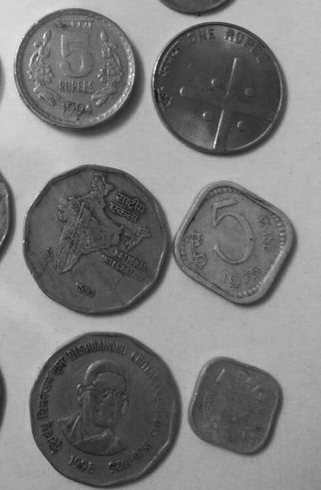

In [15]:
coins = cv2.imread("Monety_szare.bmp", cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins)

Rozwiązanie:

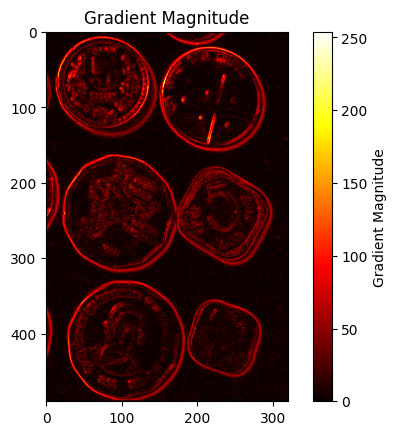

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


grad_x = cv2.Sobel(coins, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(coins, cv2.CV_64F, 0, 1, ksize=3)

grad_magnitude = cv2.magnitude(grad_x, grad_y)
grad_magnitude = cv2.normalize(grad_magnitude, None, 0, 255, cv2.NORM_MINMAX)
grad_magnitude = np.uint8(grad_magnitude)

plt.imshow(grad_magnitude, cmap="hot")
plt.colorbar(label="Gradient Magnitude")
plt.title("Gradient Magnitude")
plt.show()

---

##### Zad. 2: Detekcja krawędzi

Przeprowadź z obrazem `coins_noise` takie przekształcenia, aby zmaksymalizować możliwość rozpoznania obiektów. Wykorzystaj [filtr Canny'ego](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) do detekcji krawędzi; zbadaj jego zachowanie w zależności od wartości progów oraz sposobu redukcji szumu.

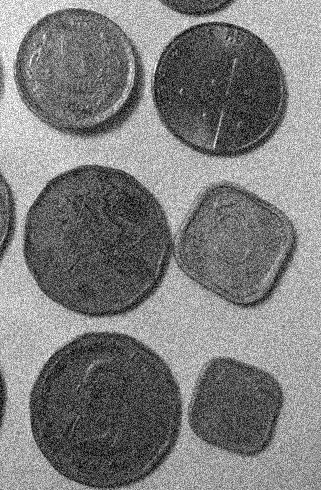

In [17]:
coins_noise = cv2.imread("Monety_szare_szum.bmp", cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins_noise)

Rozwiązanie:

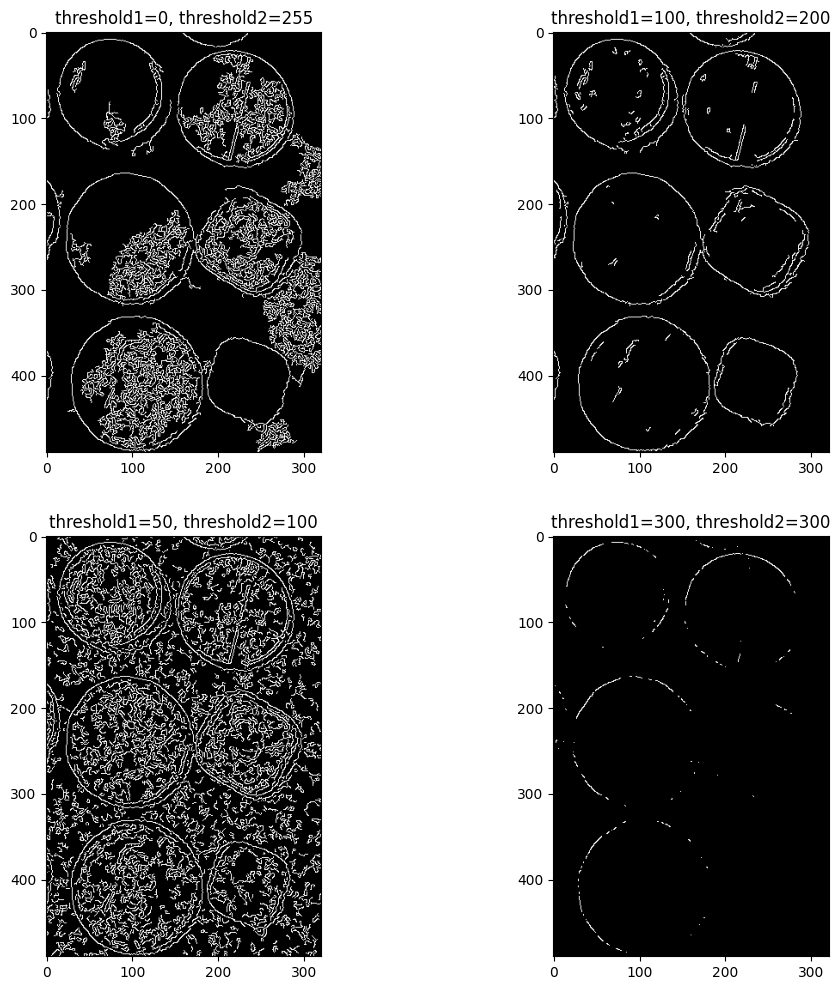

In [44]:
threshold1_values = [0, 120, 255]
threshold2_values = [0, 120, 255]

# threshold1 - lower boundary for edge detection
# - any edge with a gradient intensity below this value will be discarded

# threshold2 - upper boundary for edge detection
# - any edge with a gradient intensity above this value will be kept

threshold_values = [
    (0, 255),
    (100, 200),
    (50, 100),
    (300, 300),
]
coins_noise_blur = cv2.GaussianBlur(coins_noise, (5, 5), 0)


plt.figure(figsize=(12, 12))
for i, (threshold1, threshold2) in enumerate(threshold_values):
    edges = cv2.Canny(
        image=coins_noise_blur, threshold1=threshold1, threshold2=threshold2
    )

    plt.subplot(2, 2, i + 1)
    plt.imshow(edges, cmap="gray")
    plt.title(f"threshold1={threshold1}, threshold2={threshold2}")

plt.show()

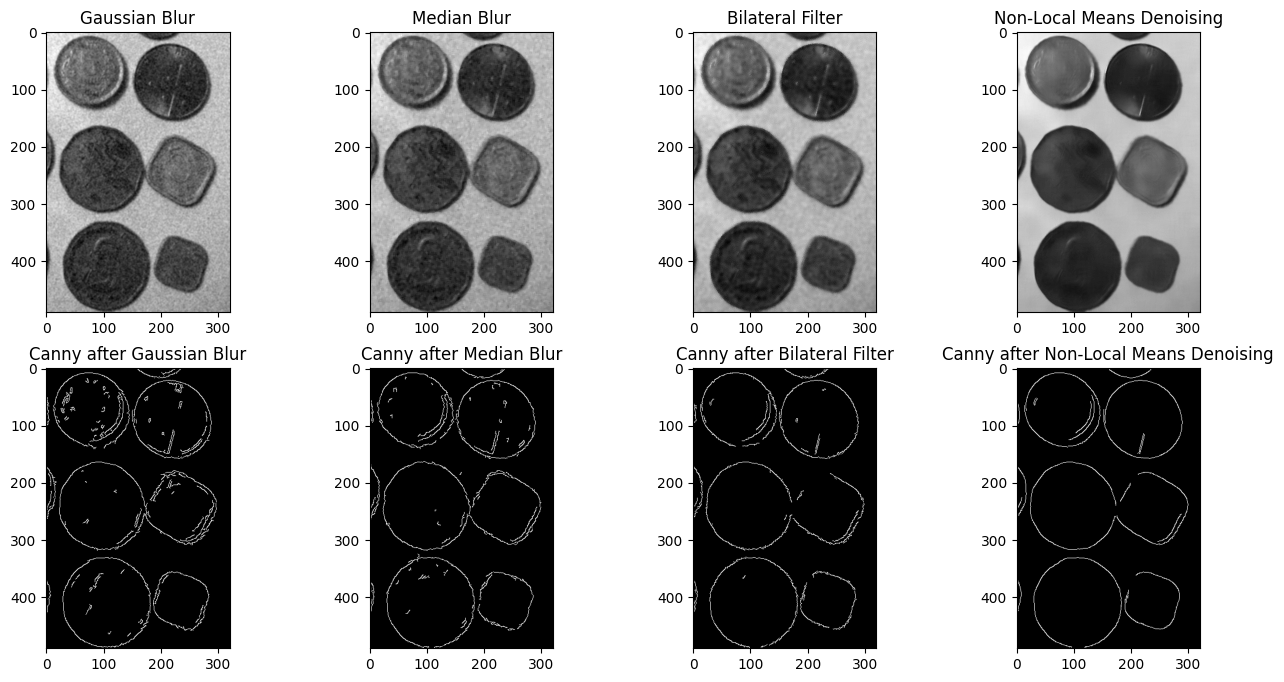

In [19]:
import cv2
import matplotlib.pyplot as plt

blurring_methods = [
    (cv2.GaussianBlur(coins_noise, (5, 5), 0), "Gaussian Blur"),
    (cv2.medianBlur(coins_noise, 5), "Median Blur"),
    (cv2.bilateralFilter(coins_noise, 9, 75, 75), "Bilateral Filter"),
    (
        cv2.fastNlMeansDenoising(coins_noise, None, 30, 7, 21),
        "Non-Local Means Denoising",
    ),
]

canny_results = [
    (cv2.Canny(blurred, 100, 200), f"Canny after {name}")
    for blurred, name in blurring_methods
]

plt.figure(figsize=(16, 8))

for i, (blurred, name) in enumerate(blurring_methods):
    plt.subplot(2, 4, i + 1)
    plt.imshow(blurred, cmap="gray")
    plt.title(name)

for i, (canny, name) in enumerate(canny_results):
    plt.subplot(2, 4, i + 5)
    plt.imshow(canny, cmap="gray")
    plt.title(name)

plt.show()

- Gaussian Blur: Smooths the image by averaging pixel values with a Gaussian kernel.
- Median Blur: Replaces each pixel's value with the median value of neighboring pixels, effective for removing salt-and-pepper noise.
- Bilateral Filter: Smooths the image while preserving edges by averaging pixels based on both spatial and intensity differences.
- Non-Local Means Denoising: Reduces noise by averaging pixels with similar intensity values, even if they are far apart, preserving details.

---

##### Zad. 3: Wyrównanie histogramu

Wyrównaj histogram obrazu `coins_noise`. Wyniki zaprezentuj za pomocą obrazów i towarzyszących im histogramów. Oceń uzyskaną zmianę w obrazie.

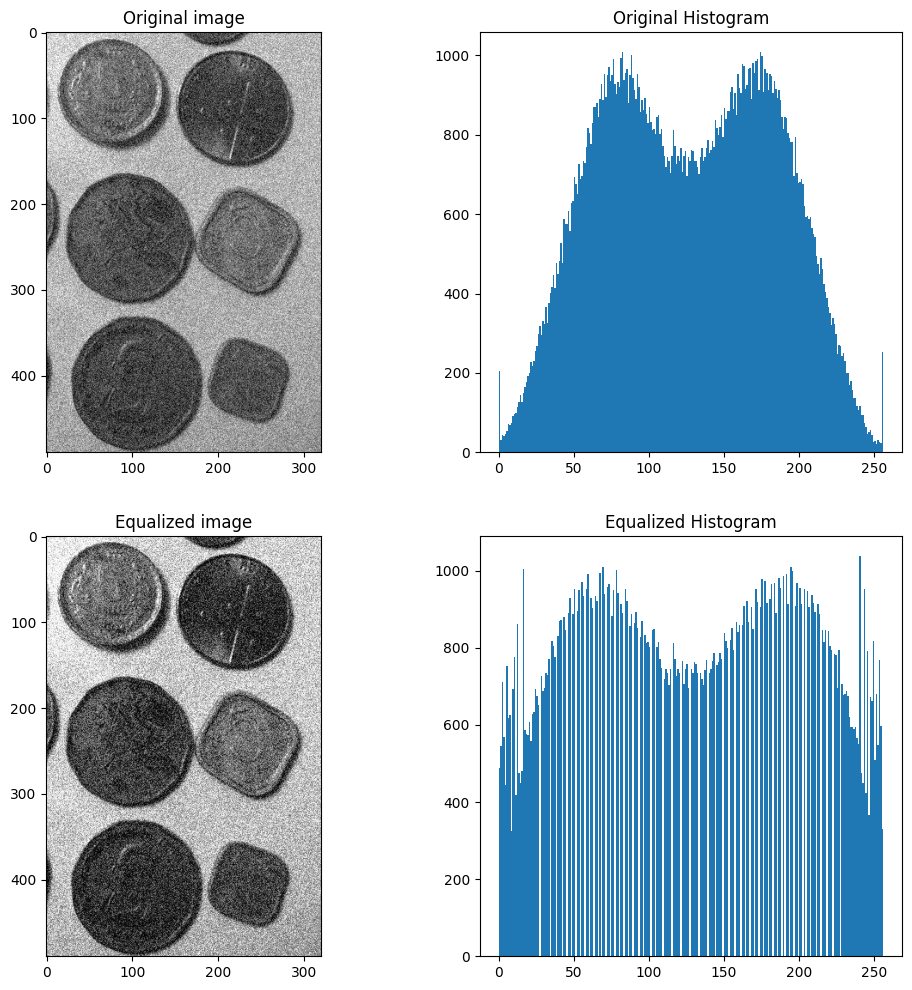

In [20]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title("Original image")
plt.imshow(coins_noise, cmap="gray")

plt.subplot(2, 2, 2)
plt.title("Original Histogram")
_ = plt.hist(coins_noise.ravel(), 256, range=(0, 256))

plt.subplot(2, 2, 3)
plt.title("Equalized image")
coins_noise_equalized = cv2.equalizeHist(coins_noise)
plt.imshow(coins_noise_equalized, cmap="gray")

plt.subplot(2, 2, 4)
plt.title("Equalized Histogram")
_ = plt.hist(coins_noise_equalized.ravel(), 256, range=(0, 256))

---

##### Zad. 4: Transformacja do rozkładu docelowego

Dla obrazu `hare_gray` wykonaj transformację do wybranego (założonego przez siebie) rozkładu docelowego, tak aby zmaksymalizować możliwość wyodrębnienia obiektu z otoczenia (zająca) przy użyciu algorytmu binaryzacji Otsu. Zacznij od zastanowienia się nad doborem rozkładu docelowego (możesz zbadać zachowanie transformacji w zależności od wybranego rozkładu).

Podpowiedź: przedstawiona we wstępie teoretycznym transformacja obu rozkładów (źródłowego i docelowego) do rozkładu jednostajnego _nie musi_ zostać faktycznie wykonana (dlatego nie używaj w zadaniu funkcji `cv2.equalizeHist`)! Wystarczy porównywanie ze sobą wartości ze skumulowanych rozkładów (rysunek 3).

Podpowiedź 2: [cv2.LUT](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f)

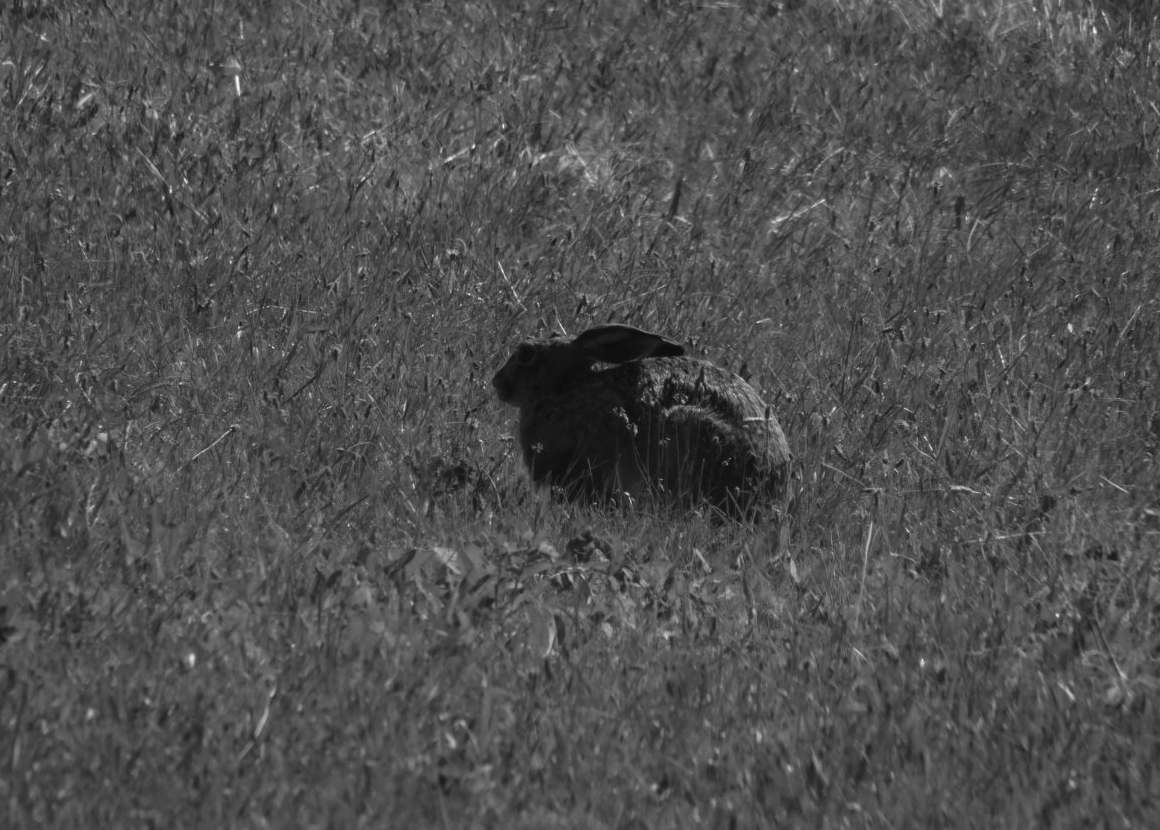

In [21]:
hare_gray = cv2.imread("Zajac.jpg", cv2.IMREAD_GRAYSCALE)
Image.fromarray(hare_gray)

Rozwiązanie:

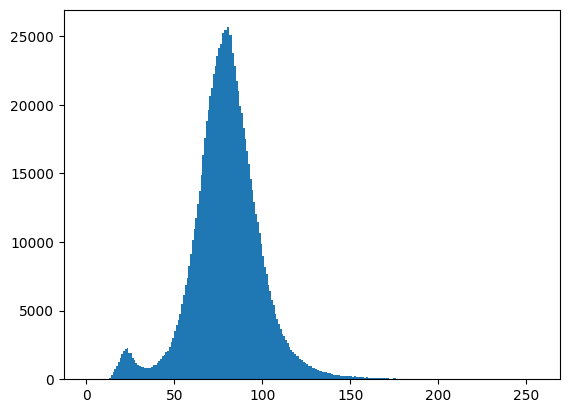

In [22]:
_ = plt.hist(hare_gray.ravel(), 256, range=(0, 256))

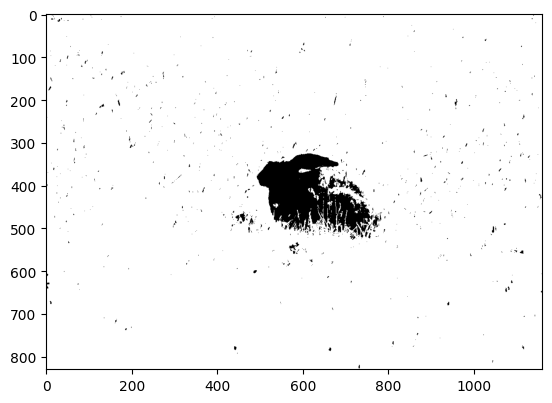

In [23]:
_, img_threshInv = cv2.threshold(hare_gray, 40, 255, cv2.THRESH_BINARY)
plt.imshow(img_threshInv, cmap="gray")

In [35]:
import numpy as np


def bimodal_gaussian(mean1, mean2, sigma1, sigma2, area1=1, area2=1, range=256):
    x = np.arange(range)

    gauss1 = area1 * np.exp(-((x - mean1) ** 2) / (2 * sigma1**2))
    gauss2 = area2 * np.exp(-((x - mean2) ** 2) / (2 * sigma2**2))
    distribution = gauss1 + gauss2
    return distribution

In [40]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

def histogram_matching_interactive(mean1, mean2, std1, std2, area1, area2):
    desired_hist = bimodal_gaussian(mean1, mean2, std1, std2, area1, area2, 256)
    pdf_desired = desired_hist / desired_hist.sum()
    cdf_desired = pdf_desired.cumsum()
    
    hist_img, bins = np.histogram(hare_gray.flatten(), 256, (0, 256))
    pdf_img = hist_img / hist_img.sum()
    cdf_img = pdf_img.cumsum()
    
    mapping = np.interp(cdf_img, cdf_desired, np.arange(256)).astype(np.uint8)
    
    img_matched = cv2.LUT(hare_gray, mapping)
    
    _, otsu_original = cv2.threshold(hare_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    _, otsu_matched = cv2.threshold(img_matched, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    plt.figure(figsize=(12, 12))
    
    plt.subplot(4, 2, 2)
    plt.title("Desired Histogram")
    plt.plot(pdf_desired)
    plt.xlim([0, 255])
    
    plt.subplot(4, 2, 3)
    plt.title("Original Image")
    plt.imshow(hare_gray, cmap="gray")
    plt.axis('off')
    
    plt.subplot(4, 2, 4)
    plt.title("Original Image Histogram")
    plt.hist(hare_gray.ravel(), bins=256, range=(0, 256), color="blue", alpha=0.7)
    plt.xlim([0, 255])
    
    plt.subplot(4, 2, 5)
    plt.title("Image After Histogram Matching")
    plt.imshow(img_matched, cmap="gray")
    plt.axis('off')
    
    plt.subplot(4, 2, 6)
    plt.title("Histogram After Matching")
    plt.hist(img_matched.ravel(), bins=256, range=(0, 256), color="green", alpha=0.7)
    plt.xlim([0, 255])
    
    plt.subplot(4, 2, 7)
    plt.title("Otsu's Binarization (Original)")
    plt.imshow(otsu_original, cmap="gray")
    plt.axis('off')
    
    plt.subplot(4, 2, 8)
    plt.title("Otsu's Binarization (Matched)")
    plt.imshow(otsu_matched, cmap="gray")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

interact(
    histogram_matching_interactive,
    mean1=widgets.IntSlider(
        min=0, max=255, step=1, value=40, description='Mean 1'
    ),
    mean2=widgets.IntSlider(
        min=0, max=255, step=1, value=255, description='Mean 2'
    ),
    std1=widgets.FloatSlider(
        min=1, max=80, step=1, value=1, description='Std Dev 1'
    ),
    std2=widgets.FloatSlider(
        min=1, max=80, step=1, value=35, description='Std Dev 2'
    ),
    area1=widgets.FloatSlider(
        min=0.1, max=5, step=0.1, value=1, description='Area 1'
    ),
    area2=widgets.FloatSlider(
        min=0.1, max=5, step=0.1, value=2.0, description='Area 2'
    )

)


interactive(children=(IntSlider(value=40, description='Mean 1', max=255), IntSlider(value=255, description='Me…

<function __main__.histogram_matching_interactive(mean1, mean2, std1, std2, area1, area2)>